In [1]:
import pandas as pd
from pandas import ExcelWriter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the file
Grocer = pd.read_csv("Groceries.csv")
print(len(Grocer))
Grocer.head()

9835


,Unnamed: 0,items
0,1,"{citrus fruit,semi-finished bread,margarine,re..."
1,2,"{tropical fruit,yogurt,coffee}"
2,3,{whole milk}
3,4,"{pip fruit,yogurt,cream cheese ,meat spreads}"
4,5,"{other vegetables,whole milk,condensed milk,lo..."


In [3]:
# deal with the item string
Grocer_clean = pd.DataFrame()    
item_list = []

for i in range(len(Grocer)):
    item = Grocer['items'][i]
   # item = item.split(',')
    for j in range(len(item)):
        if item[j] == ' ':
            b = j+1
            item = item[0:j] + '_' + item[b:]
    item_list.append(item[1:-1])

In [326]:
# calculate the frequency of item
word_counts = {}
thod_300 = {}
for item in item_list:
    item = item.split(',')
    
    for word in item:
        if word in word_counts:
            word_counts[word] = word_counts[word] + 1
        else:
            word_counts[word] = 1

# make sure what item frequency is over the thod.
for key in word_counts.keys():
    if word_counts[key] > 800:
        thod_300[key] = word_counts[key]
        #print("{}:{}".format(key,thod_300[key] ))
        
# chose the item by frequency
word_list = list(thod_300.keys())
'''
add_item = ['bottled_water', 'yogurt', 'onions','bottled_beer',
                 'whole_milk', 'coffee', 'pip_fruit', 'whole_milk', 'soda',
                 'rolls/buns', 'pork', 'canned_vagebatles', 'other_vagatables',
                 'sliced_cheese', 'specialty_cheese', 'spices', 'tropical fruit',
                 'cereals', 'soups', 'frankfurter']
for add in add_item:
    word_list.append(add)
'''

new_item_list = []
for item in  item_list:
    item_split = item.split(',')
    for word in item_split:
        if word in word_list:
            new_item_list.append(item)

In [4]:
# write the item-set into a csv file for apriori.py
import csv
with open('data.csv','w') as f:
    s=csv.writer(f,delimiter=' ',lineterminator='\n') #newline =‘’
    for item_set in new_item_list:
        s.writerow(item_set)

NameError: name 'new_item_list' is not defined

In [329]:
# run the aprioi and set the support & confidence
!python apriori.py -f data.csv -s 0.1 -c 0.3

#!python apriori.py -f tesco.csv -s 0.3 -c 0.5

item: (' o t h e r _ v e g e t a b l e s ', ' r o o t _ v e g e t a b l e s ') , 0.100
item: (' y o g u r t ', ' o t h e r _ v e g e t a b l e s ') , 0.100
item: (' w h o l e _ m i l k ', ' r o o t _ v e g e t a b l e s ') , 0.100
item: (' w h i p p e d / s o u r _ c r e a m ',) , 0.106
item: (' w h o l e _ m i l k ', ' r o l l s / b u n s ') , 0.107
item: (' w h o l e _ m i l k ', ' y o g u r t ') , 0.124
item: (' p a s t r y ',) , 0.135
item: (' t r o p i c a l _ f r u i t ',) , 0.136
item: (' w h o l e _ m i l k ', ' o t h e r _ v e g e t a b l e s ') , 0.153
item: (' b o t t l e d _ w a t e r ',) , 0.155
item: ('s a u s a g e ',) , 0.163
item: (' s h o p p i n g _ b a g s',) , 0.168
item: (' r o o t _ v e g e t a b l e s ',) , 0.178
item: (' s o d a ',) , 0.200
item: (' y o g u r t ',) , 0.244
item: (' r o l l s / b u n s ',) , 0.257
item: (' o t h e r _ v e g e t a b l e s ',) , 0.299
item: (' w h o l e _ m i l k ',) , 0.360

------------------------ RULES:
Rule: (' o t h e r _ v 

In [360]:
confident = pd.read_excel("confidence.xlsx",sheetname='Sheet1')
support = pd.read_excel("support.xlsx",sheetname='Sheet1')

In [361]:
# deal with the string of support item
item_list = []
for item in support['item']:
    item = list(item)
    
    word = str()
    for i in item:
        if i==' ' or i=='(': 
            pass
        elif  i==')' or i=="'":
            pass
        elif i == ",":
            pass
        else:
            word = word + i
    item_list.append(word)
support['item'] = item_list

In [362]:
# deal with the string of confident item
pre_item_list = []
for item in confident['pre_item']:
    item = list(item)
    
    word = str()
    for i in item:
        if i==' ' or i=='(': 
            pass
        elif  i==')' or i=="'":
            pass
        elif i == ",":
            pass
        else:
            word = word + i
    pre_item_list.append(word)
    
confident['pre_item'] = pre_item_list


item_list = []
for item in confident['post_item']:
    item = list(item)
    
    word = str()
    for i in item:
        if i==' ' or i=='(': 
            pass
        elif  i==')' or i=="'":
            pass
        elif i == ",":
            pass
        else:
            word = word + i
    item_list.append(word)
    
confident['post_item'] = item_list

In [372]:
support_dic = {}

for j in range(len(support)):
    support_dic[support['item'][j]] = support['support'][j]


In [379]:
lift_list = []
for i in range(len(confident)):
    key = confident['post_item'][i]
    lift = confident['confidence'][i] / support_dic[key]
    lift_list.append(lift)
confident['Lift'] = lift_list

In [382]:
confident

,pre_item,post_item,confidence,Lift
0,other_vegetables,root_vegetables,0.334302,1.874260
1,other_vegetables,yogurt,0.334718,1.371703
2,whole_milk,yogurt,0.344732,1.412744
3,yogurt,other_vegetables,0.410701,1.371703
4,rolls/buns,whole_milk,0.415437,1.154110
5,whole_milk,other_vegetables,0.424870,1.419029
6,yogurt,whole_milk,0.508535,1.412744
7,other_vegetables,whole_milk,0.510797,1.419029
8,root_vegetables,other_vegetables,0.561171,1.874260
9,root_vegetables,whole_milk,0.562914,1.563812


# network graph

In [203]:
import plotly.plotly as py
import networkx as nx
import networkx as nx

In [409]:
def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=100, node_color='blue', node_alpha=0.3,
               node_text_size=20,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):
    fig = plt.figure(figsize=(15, 15))
    # create networkx graph
    G=nx.DiGraph() #nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=[x*25000 for x in labels], 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    if labels is None:
        labels = range(len(graph))

    edge_labels = dict(zip(graph, labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
                                 label_pos=edge_text_pos)

    # show graph
    plt.show()
    return

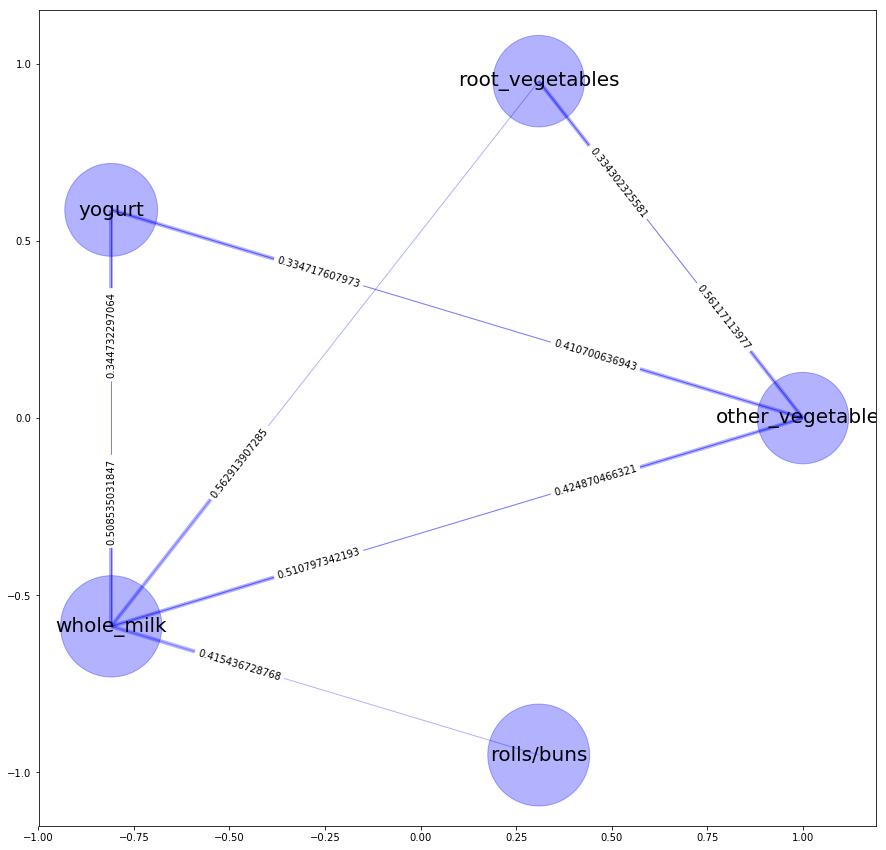

In [411]:
graph=[]

for k in range(len(confident)):
    relation = tuple((confident['pre_item'][k],confident['post_item'][k]))
    graph.append(relation)

# you may name your edge labels
#labels = map(chr, range(65, 65+len(graph)))
labels = confident['confidence']


draw_graph(graph, labels)

# if edge labels is not specified, numeric labels (0, 1, 2...) will be used
# draw_graph(graph)

In [383]:
#nx.draw(G)
#plt.savefig("path.png")
#plt.show()

In [406]:
graph

[('other_vegetables', 'root_vegetables'),
 ('other_vegetables', 'yogurt'),
 ('whole_milk', 'yogurt'),
 ('yogurt', 'other_vegetables'),
 ('rolls/buns', 'whole_milk'),
 ('whole_milk', 'other_vegetables'),
 ('yogurt', 'whole_milk'),
 ('other_vegetables', 'whole_milk'),
 ('root_vegetables', 'other_vegetables'),
 ('root_vegetables', 'whole_milk')]

# 棄用

In [ ]:
'''
writer = pd.ExcelWriter('Grocer_clean.xlsx', engine='xlsxwriter')
Grocer_clean.to_excel(writer, sheet_name='Sheet1')
writer.save()
'''

In [ ]:
'''choise the item by hand-input key word'''

'''
word_list = []
word_list = ['bottled_water', 'yogurt', 'onions', 'sausage','bottled_beer',
                 'whole_milk', 'coffee', 'pip_fruit', 'whole_milk', 'soda',
                 'rolls/buns', 'pork', 'canned_vagebatles', 'other_vagatables',
                 'sliced_cheese', 'specialty_cheese', 'spices', 'tropical fruit',
                 'cereals', 'soups', 'frankfurter']

new_item_list = []

for item in  item_list:
    item_split = item.split(',')
    for word in item_split:
        if word in word_list:
            new_item_list.append(item)
            
'''

In [ ]:
'''
DG = nx.DiGraph()
DG.add_nodes_from(['root_vegetables','tropical_fruit', 'yogurt' ])
DG.add_edges_from([('tropical_fruit', 'yogurt',{'confid':0.329}), ('root_vegetables','tropical_fruit',{'confid':0.62})])

nx.draw(DG)
#plt.savefig("path.png")
plt.show()



G.add_nodes_from([2, 3])
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node("spam")
G.remove_node("spam")
G.clear()

G.add_edge(1, 3)
G[1][3]['color'] = 'blue'
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])

Directed graphs :
>>> DG = nx.DiGraph()
>>> DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
>>> DG.out_degree(1, weight='weight')
0.5
>>> DG.degree(1, weight='weight') # 求 node1 的分支上屬性 weight 的合

'''

In [ ]:
'''
G = nx.Graph()
G.add_edges_from([(1,5), (1,2), (2,3), (2,4), (3,4), (3,5), (4,5), (5,3)])


stack = [1]  # Start from node1  
visit_list = []  
  
while len(stack) > 0:  
    #nonlocal visit_list  
    #nonlocal stack  
    vnode = stack.pop()  
    if vnode not in visit_list:  
        print("\t[Info] Visit {0}...".format(vnode))  
        visit_list.append(vnode)  
    nbs = G.neighbors(vnode)  
    for nb in nbs:  
        if nb not in visit_list:  
            print("\t[Info] Put {0} in stack...".format(nb))  
            stack.append(nb)  
    print("\tStack list={0}".format(stack))  
    print("\tVisit list={0}".format(visit_list))  
    if len(visit_list) == len(G.nodes()): break  
  
print("\t[Info] Deep First Search has {0}".format(visit_list)) 

'''

In [ ]:
'''
G=nx.Graph()
e=[('a','b',0.3),('b','c',0.9),('a','c',0.5),('c','d',1.2)]
G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G,'a','d'))

G=nx.cubical_graph()
nx.draw(G)   # default spring_layout
nx.draw(G,pos=nx.spectral_layout(G), nodecolor='r',edge_color='b')
plt.show()

'''